In [114]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import kendalltau
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import NOUN, ADJ 
from itertools import product
import matplotlib.pyplot as plt

In [115]:
df =pd.read_csv("Downloads/SimLex-999.txt", delimiter = '\t')
df.head()

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


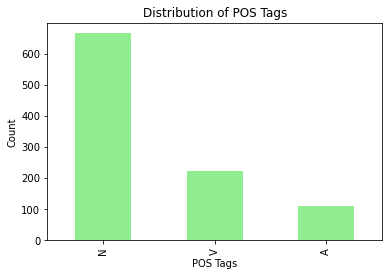

In [116]:
plt.figure(figsize=(6, 4))
df['POS'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of POS Tags')
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.show()


In [117]:
df['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

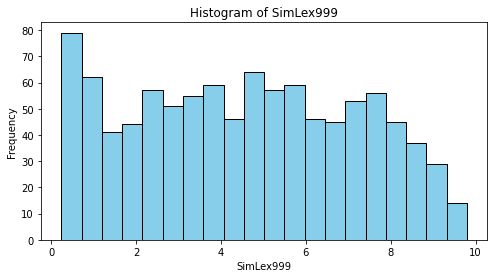

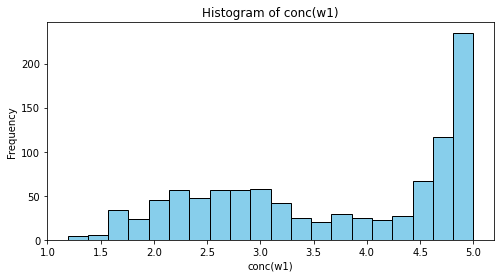

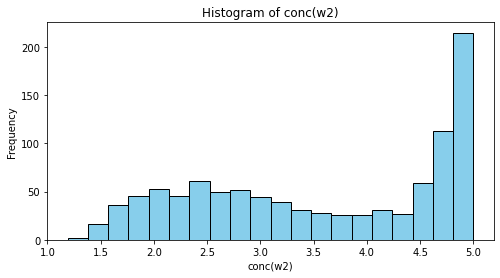

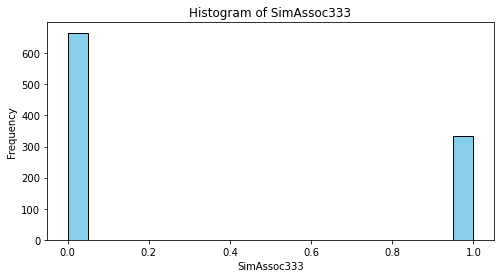

In [118]:
import matplotlib.pyplot as plt

numerical_columns = ['SimLex999', 'conc(w1)', 'conc(w2)', 'SimAssoc333']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [119]:
df.corr()

,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
SimLex999,1.000000,-0.129236,-0.119966,-0.136941,0.188751,0.257547,-0.054132
conc(w1),-0.129236,1.000000,0.805133,0.907555,0.118817,0.126789,0.028121
conc(w2),-0.119966,0.805133,1.000000,0.914543,0.106083,0.091803,0.005011
concQ,-0.136941,0.907555,0.914543,1.000000,0.110691,0.114002,0.005978
Assoc(USF),0.188751,0.118817,0.106083,0.110691,1.000000,0.603011,-0.132269
SimAssoc333,0.257547,0.126789,0.091803,0.114002,0.603011,1.000000,-0.094834
SD(SimLex),-0.054132,0.028121,0.005011,0.005978,-0.132269,-0.094834,1.000000


In [120]:
df['all_words'] = df['word1'] + ' ' + df['word2']
all_words = ' '.join(df['all_words']).split()
total_word_count = len(all_words)
word_frequencies = Counter(all_words)
word_freq_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['Frequency'])
sorted_word_frequencies = word_freq_df.sort_values(by='Frequency', ascending=False)
top_5_words = sorted_word_frequencies.head(5)

print("Total word count:", total_word_count)
print("Top 5 most frequent words:")
print(top_5_words)


Total word count: 1998
Top 5 most frequent words:
      Frequency
car          12
door         10
arm           9
book          9
give          9


## Task 2. WordNet path_similarity

In [40]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomiriszhaksylyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to calculate word similarity
def calculate_similarity(word1, word2):
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    
    if not synsets1 or not synsets2:
        return None
    
    max_similarity = 0
    for synset1 in synsets1:
        for synset2 in synsets2:
            similarity = synset1.path_similarity(synset2)
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity
    
    return max_similarity

# Read your dataset into a pandas DataFrame
data = df

# Initialize counters
missing_word_count = 0
total_word_pairs = 0

# Initialize a list to store similarity values
similarity_values = []

# Iterate over the dataset
for index, row in data.iterrows():
    word1 = row['word1']
    word2 = row['word2']
    
    total_word_pairs += 1
    
    similarity = calculate_similarity(word1, word2)
    if similarity is not None:
        similarity_values.append(similarity)
    else:
        missing_word_count += 1

# Add the similarity values as a new column in the DataFrame
data['similarity'] = similarity_values

# Print the number of word pairs where one of the words is missing in WordNet
print(f"Number of word pairs with missing words in WordNet: {missing_word_count} out of {total_word_pairs}")

Number of word pairs with missing words in WordNet: 0 out of 999


In [122]:
data

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex),all_words,similarity
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,old new,0.333333
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,smart intelligent,0.333333
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,hard difficult,1.000000
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,happy cheerful,0.333333
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,hard easy,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99,join acquire,0.333333
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44,send attend,0.200000
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97,gather attend,0.250000
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75,absorb withdraw,0.333333


## Task 3. FastText

In [8]:
# import fasttext.util
# fasttext.util.download_model('en', if_exists='ignore')  # English
# ft = fasttext.load_model('cc.en.300.bin')

In [123]:
import gensim

# Load the FastText model (replace 'path_to_model.bin' with the actual path)
model_path = 'cc.en.300.bin'
model = gensim.models.FastText.load_fasttext_format(model_path)

# Function to calculate cosine similarity between word vectors
def cosine_similarity(word1, word2):
    try:
        vec1 = model.wv[word1]
        vec2 = model.wv[word2]
        similarity = 1 - np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
        return similarity
    except KeyError:
        return None

# Initialize lists to store the results
word1_list = []
word2_list = []
similarity_list = []
missing_words_list = []

# Calculate word similarities and check for missing words
for index, row in df.iterrows():
    word1 = row['word1']
    word2 = row['word2']
    
    similarity = 1-cosine_similarity(word1, word2)
    
    if similarity is not None:
        word1_list.append(word1)
        word2_list.append(word2)
        similarity_list.append(similarity)
        missing_words_list.append(None)
    else:
        word1_list.append(word1)
        word2_list.append(word2)
        similarity_list.append(None)
        missing_words_list.append(f"One or both words missing: '{word1}' and '{word2}'")

# Create a new DataFrame to store the results
task3 = pd.DataFrame({
    'word1': word1_list,
    'word2': word2_list,
    'FastText1': similarity_list,
})

<ipython-input-123-57cb3e946df4>:5: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = gensim.models.FastText.load_fasttext_format(model_path)


In [76]:
task3

,word1,word2,FastText1
0,old,new,0.441964
1,smart,intelligent,0.704955
2,hard,difficult,0.631380
3,happy,cheerful,0.545871
4,hard,easy,0.486345
...,...,...,...
994,join,acquire,0.229357
995,send,attend,0.350965
996,gather,attend,0.377495
997,absorb,withdraw,0.297315


In [16]:
non_none_missing_words = [missing_words for missing_words in missing_words_list if missing_words is not None]
print("Missing Words (Not None):")
for missing_words in non_none_missing_words:
    print(missing_words)

Missing Words (Not None):


## Task 4

In [124]:
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import NOUN, ADJ
from itertools import product

# Function to map POS tags from 'A' to WordNet's POS tags
def map_pos(pos):
    if pos == 'A':
        return wn.ADJ
    if pos == 'V':
        return wn.VERB
    else:
        return wn.NOUN  # Default to noun if POS is not recognized

# Function to calculate word similarity using WordNet's Wu-Palmer Similarity
def calculate_similarity(word1, word2, pos1, pos2):
    synsets1 = wordnet.synsets(word1, pos=map_pos(pos1))
    synsets2 = wordnet.synsets(word2, pos=map_pos(pos2))
    
    similarity_scores = []
    
    for synset1, synset2 in product(synsets1, synsets2):
        similarity = synset1.wup_similarity(synset2)
        if similarity is not None:
            similarity_scores.append(similarity)
    
    return max(similarity_scores, default=None)

# Initialize counters
total_word_pairs = len(df)
pairs_with_missing_words = 0
similarity_scores = []

# Calculate word similarities and count missing words
for index, row in df.iterrows():
    word1 = row['word1']
    word2 = row['word2']
    pos1 = row['POS']
    pos2 = row['POS']
    
    if not wordnet.synsets(word1, pos=map_pos(pos1)):
        pairs_with_missing_words += 1
        continue
    
    if not wordnet.synsets(word2, pos=map_pos(pos2)):
        pairs_with_missing_words += 1
        continue
    
    similarity = calculate_similarity(word1, word2, pos1, pos2)
    similarity_scores.append(similarity)
    
    if similarity is not None:
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.2f}")
    else:
        print(f"No similarity found between '{word1}' and '{word2}'")

# Report the number of word pairs with missing words in WordNet
print(f"Number of word pairs with missing words in WordNet: {pairs_with_missing_words}/{total_word_pairs}")

task4 = pd.DataFrame({
    'word1': word1_list,
    'word2': word2_list,
    'Wu_Palmer': similarity_scores,
})

Similarity between 'old' and 'new': 0.50
Similarity between 'smart' and 'intelligent': 0.50
Similarity between 'hard' and 'difficult': 1.00
Similarity between 'happy' and 'cheerful': 0.50
Similarity between 'hard' and 'easy': 0.50
Similarity between 'fast' and 'rapid': 0.50
Similarity between 'happy' and 'glad': 1.00
Similarity between 'short' and 'long': 0.50
Similarity between 'stupid' and 'dumb': 0.50
Similarity between 'weird' and 'strange': 0.50
Similarity between 'wide' and 'narrow': 0.50
Similarity between 'bad' and 'awful': 0.50
Similarity between 'easy' and 'difficult': 0.50
Similarity between 'bad' and 'terrible': 0.50
Similarity between 'hard' and 'simple': 0.50
Similarity between 'smart' and 'dumb': 0.50
Similarity between 'insane' and 'crazy': 0.50
Similarity between 'happy' and 'mad': 0.50
Similarity between 'large' and 'huge': 0.50
Similarity between 'hard' and 'tough': 1.00
Similarity between 'new' and 'fresh': 1.00
Similarity between 'sharp' and 'dull': 0.50
Similarity

Similarity between 'army' and 'legion': 0.94
Similarity between 'metal' and 'aluminum': 0.93
Similarity between 'chair' and 'bench': 0.90
Similarity between 'cloud' and 'fog': 0.88
Similarity between 'boy' and 'son': 1.00
Similarity between 'water' and 'ice': 0.62
Similarity between 'bed' and 'blanket': 0.92
Similarity between 'attorney' and 'lawyer': 1.00
Similarity between 'area' and 'zone': 0.77
Similarity between 'business' and 'company': 0.77
Similarity between 'clothes' and 'fabric': 0.71
Similarity between 'sweater' and 'jacket': 0.82
Similarity between 'money' and 'capital': 0.62
Similarity between 'hand' and 'foot': 0.86
Similarity between 'alcohol' and 'cocktail': 0.90
Similarity between 'yard' and 'inch': 0.86
Similarity between 'molecule' and 'atom': 1.00
Similarity between 'lens' and 'camera': 0.84
Similarity between 'meal' and 'dinner': 0.93
Similarity between 'eye' and 'tear': 0.57
Similarity between 'god' and 'devil': 0.88
Similarity between 'loop' and 'belt': 0.95
Simi

Similarity between 'men' and 'fraternity': 0.67
Similarity between 'buddy' and 'companion': 0.67
Similarity between 'teacher' and 'helper': 0.60
Similarity between 'body' and 'stomach': 0.83
Similarity between 'tongue' and 'throat': 0.71
Similarity between 'house' and 'carpet': 0.62
Similarity between 'intelligence' and 'skill': 0.83
Similarity between 'journey' and 'conquest': 0.60
Similarity between 'god' and 'prey': 0.67
Similarity between 'brother' and 'soul': 0.75
Similarity between 'adversary' and 'opponent': 0.75
Similarity between 'death' and 'catastrophe': 0.71
Similarity between 'monster' and 'demon': 1.00
Similarity between 'day' and 'morning': 0.83
Similarity between 'man' and 'victor': 0.71
Similarity between 'friend' and 'guy': 0.67
Similarity between 'song' and 'story': 0.55
Similarity between 'ray' and 'sunshine': 0.92
Similarity between 'guy' and 'stud': 0.90
Similarity between 'chicken' and 'rice': 0.60
Similarity between 'box' and 'elevator': 0.71
Similarity between 

Similarity between 'appointment' and 'engagement': 1.00
Similarity between 'birthday' and 'year': 0.67
Similarity between 'word' and 'clue': 0.71
Similarity between 'author' and 'creator': 0.71
Similarity between 'atom' and 'carbon': 0.80
Similarity between 'archbishop' and 'bishop': 0.96
Similarity between 'letter' and 'paragraph': 0.71
Similarity between 'page' and 'paragraph': 0.25
Similarity between 'steeple' and 'chapel': 0.71
Similarity between 'muscle' and 'bone': 0.82
Similarity between 'muscle' and 'tongue': 0.80
Similarity between 'boy' and 'soldier': 0.57
Similarity between 'belly' and 'abdomen': 1.00
Similarity between 'guy' and 'girl': 0.63
Similarity between 'bed' and 'chair': 0.80
Similarity between 'clothes' and 'jacket': 0.76
Similarity between 'gun' and 'knife': 0.90
Similarity between 'tin' and 'metal': 0.93
Similarity between 'bottle' and 'container': 0.88
Similarity between 'hen' and 'turkey': 0.89
Similarity between 'meat' and 'bread': 0.77
Similarity between 'arm

Similarity between 'give' and 'deny': 0.50
Similarity between 'deserve' and 'earn': 0.33
Similarity between 'get' and 'put': 0.74
Similarity between 'locate' and 'find': 0.80
Similarity between 'appear' and 'attend': 0.40
Similarity between 'know' and 'comprehend': 0.50
Similarity between 'pretend' and 'imagine': 0.33
Similarity between 'satisfy' and 'please': 0.67
Similarity between 'cherish' and 'keep': 0.40
Similarity between 'argue' and 'differ': 0.29
Similarity between 'overcome' and 'dominate': 0.50
Similarity between 'behave' and 'obey': 0.33
Similarity between 'cooperate' and 'participate': 0.40
Similarity between 'achieve' and 'try': 0.33
Similarity between 'fail' and 'discourage': 0.57
Similarity between 'begin' and 'quit': 0.50
Similarity between 'say' and 'participate': 0.50
Similarity between 'come' and 'bring': 0.50
Similarity between 'declare' and 'announce': 1.00
Similarity between 'read' and 'comprehend': 0.50
Similarity between 'take' and 'leave': 0.50
Similarity betw

In [126]:
task4


,word1,word2,Wu_Palmer
0,old,new,0.500000
1,smart,intelligent,0.500000
2,hard,difficult,1.000000
3,happy,cheerful,0.500000
4,hard,easy,0.500000
...,...,...,...
994,join,acquire,0.500000
995,send,attend,0.333333
996,gather,attend,0.400000
997,absorb,withdraw,0.500000


## Task 5

In [65]:
import gensim

model_path = 'downloads/wiki-news-300d-1M.vec'
model = gensim.models.KeyedVectors.load_word2vec_format(model_path)

# Function to calculate cosine similarity between word vectors
def cosine_similarity(word1, word2):
    try:
        similarity = model.similarity(word1, word2)
        return similarity
    except KeyError:
        return None

# Initialize a list to store the similarity scores
similarity_scores = []
pairs_with_missing_words = 0
word1_list = []
word2_list = []
similarity_list = []

# Calculate word similarities and count missing words
for index, row in df.iterrows():
    word1 = row['word1']
    word2 = row['word2']
    
    similarity = cosine_similarity(word1, word2)
    
    if similarity is not None:
        print(f"Similarity between '{word1}' and '{word2}': {similarity:.2f}")
        word1_list.append(word1)
        word2_list.append(word2)
        similarity_list.append(similarity)
    else:
        pairs_with_missing_words += 1
        print(f"One or both words missing in the model: '{word1}' and '{word2}'")

task5 = pd.DataFrame({
    'word1': word1_list,
    'word2': word2_list,
    'FastText2': similarity_list,
})

# Report the number of word pairs with missing words in the model
print(f"Number of word pairs with missing words in the model: {pairs_with_missing_words}/{len(df)}")


Similarity between 'old' and 'new': 0.65
Similarity between 'smart' and 'intelligent': 0.77
Similarity between 'hard' and 'difficult': 0.70
Similarity between 'happy' and 'cheerful': 0.66
Similarity between 'hard' and 'easy': 0.65
Similarity between 'fast' and 'rapid': 0.71
Similarity between 'happy' and 'glad': 0.75
Similarity between 'short' and 'long': 0.75
Similarity between 'stupid' and 'dumb': 0.84
Similarity between 'weird' and 'strange': 0.89
Similarity between 'wide' and 'narrow': 0.68
Similarity between 'bad' and 'awful': 0.73
Similarity between 'easy' and 'difficult': 0.73
Similarity between 'bad' and 'terrible': 0.76
Similarity between 'hard' and 'simple': 0.52
Similarity between 'smart' and 'dumb': 0.71
Similarity between 'insane' and 'crazy': 0.82
Similarity between 'happy' and 'mad': 0.55
Similarity between 'large' and 'huge': 0.82
Similarity between 'hard' and 'tough': 0.74
Similarity between 'new' and 'fresh': 0.62
Similarity between 'sharp' and 'dull': 0.57
Similarity

In [66]:
task5

,word1,word2,FastText2
0,old,new,0.653033
1,smart,intelligent,0.768561
2,hard,difficult,0.701083
3,happy,cheerful,0.663085
4,hard,easy,0.645981
...,...,...,...
994,join,acquire,0.542489
995,send,attend,0.587319
996,gather,attend,0.587173
997,absorb,withdraw,0.463984


## Task 6

In [127]:
merged_df = data.merge(task3, on=['word1', 'word2'], suffixes=('_task1', '_data'), how='inner')
merged_df = merged_df.merge(task4, on=['word1', 'word2'], suffixes=('', '_task4'), how='inner')
merged_df = merged_df.merge(task5, on=['word1', 'word2'], suffixes=('', '_task5'), how='inner')
merged_df

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex),all_words,similarity,FastText1,Wu_Palmer,FastText2
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,old new,0.333333,0.441964,0.500000,0.653033
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,smart intelligent,0.333333,0.704955,0.500000,0.768561
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,hard difficult,1.000000,0.631380,1.000000,0.701083
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,happy cheerful,0.333333,0.545871,0.500000,0.663085
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,hard easy,0.333333,0.486345,0.500000,0.645981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99,join acquire,0.333333,0.229357,0.500000,0.542489
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44,send attend,0.200000,0.350965,0.333333,0.587319
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97,gather attend,0.250000,0.377495,0.400000,0.587173
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75,absorb withdraw,0.333333,0.297315,0.500000,0.463984


In [129]:
from scipy.stats import kendalltau

gold_standard = merged_df['SimLex999']
obtained_scores = merged_df[['similarity', 'FastText1', 'Wu_Palmer', 'FastText2']]

# Calculate Kendall's tau for each pair of obtained scores
kendall_tau_scores = []
for column_name, obtained_score in obtained_scores.iteritems():
    tau, _ = kendalltau(gold_standard, obtained_score)
    kendall_tau_scores.append((column_name, tau))

# Create a summary table for Kendall's tau
kendall_tau_summary = pd.DataFrame(kendall_tau_scores, columns=['Model', "Kendall's Tau"])

# Print the summary table
print(kendall_tau_summary)


        Model  Kendall's Tau
0  similarity       0.352995
1   FastText1       0.330140
2   Wu_Palmer       0.321144
3   FastText2       0.322270
